In [1]:
import subprocess
import sys
import os
from IPython.display import clear_output
import csv
import pandas as pd

In [2]:
def exec_threads(version):
    times = []
    for threads in range(1,51):
        clear_output(wait=True)
        print(f"Current version: {version}")
        print("Threads:", threads)
        all_time=0
        for i in range(10):
            output = subprocess.check_output(f"/home/xbit18/.pyenv/versions/{version}/bin/python fib.py {threads}", shell=True)
            all_time += float(output.decode(sys.stdout.encoding).replace('\n',''))
        times.append(round(all_time/10, ndigits=3))
    return times

In [3]:
versions = {
    "3.9.18":False,
    "nogil-3.9.10-1":True,
    "3.10.13":True,
    "3.11.8":True,
    "3.12.2":True
}

times={}
for version,done in versions.items():
    if done:
        continue
    
    if "nogil" in version:
        for val in [0,1]:
            os.environ["PYTHONGIL"] = str(val)
            version_str = f"3.9-nogil_{val}"
            tms = exec_threads(version)
            times[f"{version_str}"] = tms
            with open("times.csv", "a") as csv_file:
                writer = csv.writer(csv_file, delimiter=',')
                to_insert = []
                to_insert.append(version_str)
                to_insert.extend(tms)
                writer.writerow(to_insert)
    else:
        times[f"{version}"] = exec_threads(version)
        with open("times.csv", "a") as csv_file:
            writer = csv.writer(csv_file, delimiter=',')
            to_insert = []
            to_insert.append(version)
            to_insert.extend(times[version])
            writer.writerow(to_insert)

Current version: 3.9.18
Threads: 50


In [4]:
import pandas as pd
import numpy as np

In [5]:
arr = np.genfromtxt('times.csv',delimiter=',',dtype=str)

In [6]:
df = pd.DataFrame(arr.T)

In [7]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [8]:
df

,3.9.18,3.9-nogil_0,3.9-nogil_1,3.10.13,3.11.8,3.12.2
1,1.795,0.764,0.7668,2.004,1.097,0.944
2,4.01,0.7711,1.5416000000000003,4.514,2.399,2.062
3,5.965,0.789,2.2671,6.61,3.598,3.187
4,7.816,0.8110000000000002,3.0275000000000003,8.472,4.608,4.1
5,9.641,1.0448,3.7655000000000003,10.53,5.617,5.053
6,11.444,1.2497,4.506200000000001,12.466,6.718,5.959
7,13.285,1.416,5.3009,14.547,7.785,6.956
8,15.027,1.5772,6.0797,16.59,8.836,7.861
9,16.85,1.7772000000000001,6.799300000000001,18.571,9.856,8.808
10,18.637,1.9827,7.580800000000001,20.577,10.965,9.757


In [9]:
import matplotlib.pyplot as plt
import matplotlib
import multiprocessing

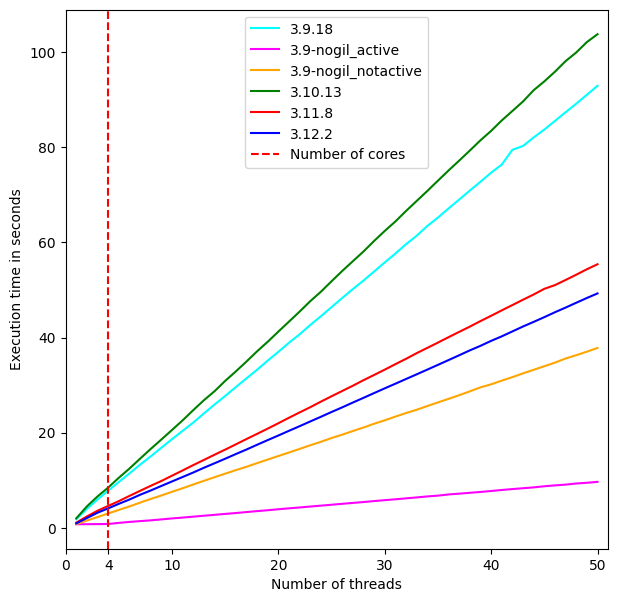

In [21]:
plt.figure(figsize=(7,7))
columns = list(df.columns)
for col in range(len(columns)):
    val = columns[col].replace("nogil_0","nogil_active").replace("nogil_1","nogil_notactive")
    columns[col]=val

colors = "blue,red,green,orange,magenta,cyan".split(",")
for col in df.columns:
    vals = list(df[col].astype(float))
    plt.plot(list(range(1,51)), vals, color=colors.pop())
plt.axvline(x = multiprocessing.cpu_count(), color = 'r', linestyle = '--') 
plt.xlabel("Number of threads")
plt.ylabel("Execution time in seconds")
legend = columns.copy()
legend.append("Number of cores")
plt.legend(legend)
plt.xlim((0,51))
ticks = [i for i in range(51) if i%10 == 0]
ticks.append(4)
ticks.sort()
plt.xticks(ticks)
plt.savefig("multi_version_graph.png", bbox_inches='tight',transparent=False, pad_inches=0.1)
plt.show()